
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Oct 14, 2019)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

largepoll = pd.read_csv('poll-larger.csv')
largepoll['vote'].value_counts(normalize=True)

def sample(orgeronWinPercent,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < orgeronWinPercent,'Orgeron','Saban')})

distDF = pd.DataFrame([sample(0.5181)['vote'].value_counts(normalize=True) for i in range(1000)])
def samplingdist(orgeronWinPercent,n=10000):
    return pd.DataFrame([sample(orgeronWinPercent,n)['vote'].value_counts(normalize=True) for i in range(1000)])
def quantiles(orgeronWinPercent,n=10000):
    distDF = samplingdist(orgeronWinPercent,n)
    return distDF['Orgeron'].quantile(0.025), distDF['Orgeron'].quantile(0.975)
quantiles(0.5181)

(0.5083, 0.5279)

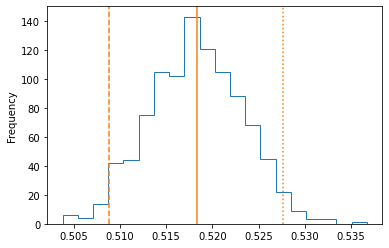

In [47]:
distDF = samplingdist(0.5181,10000)
distDF['Orgeron'].plot(kind='hist', histtype='step',bins=20)
plt.axvline(distDF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(distDF['Orgeron'].quantile(0.500), c='C1')
plt.axvline(distDF['Orgeron'].quantile(0.975), c='C1',linestyle=':')

In [48]:
print("The 95% confidence interval is: [0.5083, 0.5279]") #a
print("The Point Estimate is: 0.5181 +/- 0.01 (at 95% confidence)") #b
print("The margin of error lies within 1% when we use a sample size of 10,000.") #c

The 95% confidence interval is: [0.5083, 0.5279]
The Point Estimate is: 0.5181 +/- 0.01 (at 95% confidence)
The margin of error lies within 1% when we use a sample size of 10,000.
